In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# Revision of ID2214 Programming for Data Science

## 3 Data preparation and evaluation
* The instances need to be represented by fixed-length feature vectors
* Information from test instances should not affect choice of data preparation and learning algorithms
* there can be no missing numerical or categorical values
* numerical features have to be normalized
* curse of dimensinality has to be remedied by limiting the number of features

### 3.1 Handling missing values
remove/impute(mean, mode, nearest neighbors)

In [12]:
df = pd.DataFrame({"id":[np.nan, 2, 3, 4, 5],
                  "grade":[np.nan, "b", np.nan, "c", np.nan],
                  "award":[np.nan, "gold", "silver", "bronze", np.nan]})
display(df)
# axis="index" is default
display(df.dropna(how="any", axis="index"))
# drop when grade, award is all missing
display(df.dropna(how="all", subset=["grade", "award"]))

,id,grade,award
0,NaN,NaN,NaN
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze
4,5.0,NaN,NaN


,id,grade,award
1,2.0,b,gold
3,4.0,c,bronze


,id,grade,award
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze


In [19]:
# impute missing values

df = pd.DataFrame({"id":[np.nan, 2, 3, 4, 5],
                  "grade":[np.nan, "b", np.nan, "c", np.nan],
                  "award":[np.nan, "gold", "silver", "bronze", np.nan]})
display(df)
# grade "e", "award" "iron"
display(df.fillna(value={"grade": "e", "award": "iron"}))
# impute with mean
display(df["id"].fillna(df["id"].mean(), inplace=False))
# impute with mode
df["award"].fillna(df["award"].mode()[0], inplace=True)
display(df)

,id,grade,award
0,NaN,NaN,NaN
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze
4,5.0,NaN,NaN


,id,grade,award
0,NaN,e,iron
1,2.0,b,gold
2,3.0,e,silver
3,4.0,c,bronze
4,5.0,e,iron


0    3.5
1    2.0
2    3.0
3    4.0
4    5.0
Name: id, dtype: float64

,id,grade,award
0,NaN,NaN,bronze
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze
4,5.0,NaN,bronze


### 3.2 Encoding features: from numerical to categorical (Discretization)

equal width: each range is the same size  
equal size: the same number of observed values fall into each range

In [40]:
# equal width: each range is the same size
# one column of 100 random values
df = pd.DataFrame({"values":np.random.rand(100)})
res, bins = pd.cut(df["values"], 10, retbins=True)
display(bins)
display(res)

bins[0], bins[-1]=-np.inf, np.inf
# bins
df2 = pd.DataFrame({"values":np.ones(100)})

# apply bins to new(test) data
new_res = pd.cut(df2["values"], bins)

display(new_res)

array([0.00241647, 0.10305879, 0.20270466, 0.30235052, 0.40199639,
       0.50164225, 0.60128812, 0.70093399, 0.80057985, 0.90022572,
       0.99987158])

0       (0.302, 0.402]
1           (0.9, 1.0]
2       (0.601, 0.701]
3           (0.9, 1.0]
4       (0.203, 0.302]
            ...       
95      (0.601, 0.701]
96    (0.00242, 0.103]
97      (0.302, 0.402]
98      (0.402, 0.502]
99      (0.103, 0.203]
Name: values, Length: 100, dtype: category
Categories (10, interval[float64]): [(0.00242, 0.103] < (0.103, 0.203] < (0.203, 0.302] < (0.302, 0.402] ... (0.601, 0.701] < (0.701, 0.801] < (0.801, 0.9] < (0.9, 1.0]]

0     (0.9, inf]
1     (0.9, inf]
2     (0.9, inf]
3     (0.9, inf]
4     (0.9, inf]
         ...    
95    (0.9, inf]
96    (0.9, inf]
97    (0.9, inf]
98    (0.9, inf]
99    (0.9, inf]
Name: values, Length: 100, dtype: category
Categories (10, interval[float64]): [(-inf, 0.103] < (0.103, 0.203] < (0.203, 0.302] < (0.302, 0.402] ... (0.601, 0.701] < (0.701, 0.801] < (0.801, 0.9] < (0.9, inf]]

eqaul sized binning will leads to bins for which the observed frequencies are nearly the same. It is more informative when being used before Naive-Bayes because the other one, equal-width binning will possibly put most of the observations into one bin, hence not allowing the learning algorithms to distinguish between the classes using discretized features.
Equal-width binning may be helpful when we want to inspect how features are distributed(e.g. whether they form the normal distribution or not).(plot)

In [35]:
# equal-sized binning (using qcut)
df = pd.DataFrame({"values": np.random.randn(100)})
res, bins = pd.qcut(df["values"],10,retbins=True)
display(bins)
display(res)

array([-2.14096076, -1.17425366, -0.96843002, -0.61919754, -0.34723074,
       -0.08324453,  0.1207581 ,  0.31629024,  0.62042679,  1.12610787,
        1.93455278])

0     (-0.347, -0.0832]
1        (0.121, 0.316]
2         (0.316, 0.62]
3         (0.62, 1.126]
4      (-0.0832, 0.121]
            ...        
95     (-0.968, -0.619]
96     (-1.174, -0.968]
97     (-0.0832, 0.121]
98       (0.121, 0.316]
99     (-2.142, -1.174]
Name: values, Length: 100, dtype: category
Categories (10, interval[float64]): [(-2.142, -1.174] < (-1.174, -0.968] < (-0.968, -0.619] < (-0.619, -0.347] ... (0.121, 0.316] < (0.316, 0.62] < (0.62, 1.126] < (1.126, 1.935]]

### 3.3 Encoding features: from categorical to numerical (One-Hot encoding)
a new binary feature is created for each possible categorical value, and the new feature values for an instance are all assigned zero except for the feature corresponding to the categorical value appearing in the original row.

e.g.
one feature `color` has samples belonging to three categories `brown`, `red`, `green`
now create three feature columns `color-brown`, `color-red`, `color-green` which only involve binary values. if samples belong to one feature, then they get 1, otherwise 0 in that feature column in their own rows.

* notice feature explosion

In [8]:
# convert category features of a dataframe into one_hot encoding
def create_one_hot(df):
    df_dict = dict()
    one_hot = dict()
    for i in df.columns:
        if i!="ID":
            for c in sorted(df[i].unique()):
                # generate one new feature column
                df_dict[i+"-"+c] = [1.0 if k==c else 0.0 for k in df[i]]
                if i not in one_hot:
                    one_hot[i] = [c]
                else:
                    one_hot[i].append(c)
    new_df = pd.DataFrame(df_dict)
    new_df.insert(0, "ID", df["ID"])
    return new_df, one_hot

def apply_one_hot(df, one_hot):
    df_dict = {}
    for col in one_hot:
        for c in one_hot[col]:
            df_dict[col+"-"+c] = [1.0 if c==k else 0.0 for k in df[col]]
    
    new_df = pd.DataFrame(df_dict)
    new_df.insert(0, "ID", df["ID"])
    return new_df

dataframe = pd.DataFrame({"ID":[1,2,3,4,5], "color":["green","red","yellow","green","red"]})
new_df, one_hot = create_one_hot(dataframe)
display(new_df)

test_dataframe = pd.DataFrame({"ID":[1,2,3,4,5], "color":["brown","grey","yellow","green","red"]})
test_new_df = apply_one_hot(test_dataframe, one_hot)
display(test_new_df)

,ID,color-green,color-red,color-yellow
0,1,1.0,0.0,0.0
1,2,0.0,1.0,0.0
2,3,0.0,0.0,1.0
3,4,1.0,0.0,0.0
4,5,0.0,1.0,0.0


,ID,color-green,color-red,color-yellow
0,1,0.0,0.0,0.0
1,2,0.0,0.0,0.0
2,3,0.0,0.0,1.0
3,4,1.0,0.0,0.0
4,5,0.0,1.0,0.0


### 3.4 Encoding features: normalization
min-max **normalization**
Attributes are often normalized
to lie in a fixed range—usually from zero to one—by dividing all values by the
maximum value encountered or by subtracting the minimum value and dividing
by the range between the maximum and minimum values

(xi-xmin)/(xmax-xmin)

z-normalization (**standardization**)
calculate the statistical mean and standard deviation of the attribute values, subtract the mean from each value, and divide the result by the standard deviation.

(xi-xmean)/s

In [11]:
df = pd.DataFrame({"values": np.random.randn(100)})
min = df["values"].min()
max = df["values"].max()
df["values"] = [(x-min)/(max-min) for x in df["values"]]
print("min-max normalization:")
display(df)

df = pd.DataFrame({"values": np.random.randn(100)})
mean = df["values"].mean()
std = df["values"].std()
df["values"] = df["values"].apply(lambda x: (x-mean)/std)
print("z-normalization:")
display(df)

min-max normalization:


,values
0,0.769140
1,0.219020
2,0.621250
3,0.366393
4,0.357488
...,...
95,0.527664
96,0.519710
97,0.267881
98,0.649702


z-normalization:


,values
0,-0.242194
1,0.216455
2,0.561687
3,-0.307243
4,-0.779873
...,...
95,-1.415000
96,-0.014525
97,1.747559
98,-1.560561


### 3.5 Encoding features: dimensinality reduction
1. Feature selection
1.1 Filtering approaches
ranking the input features based on the correlation with the output (target) feature, using information gain
1.2 Wrapper approaches
iteratively choosing features based on their effect/presence in models generated by a specific learning algorithms

2. Principal Component Analysis(PCA)
projecting multiple numerical features into new features by a **linear combination**, ordered by the amount of variability they can account for, from which the (k) highest ranked are chosen. (O(p^2n+n^3))

3. Random Projection (RP)
projecting multiple numerical features into (k) new features using a sparse random matrix; computationally not so costly.
(O(pnk))


Exams:
  
1 Will mean-value imputation have the same effect, if performed
before normalization, on the distribution of the normalized
values for those values that were originally not missing, for
min-max normalization and z-normalization? Explain your
reasoning.  

2 Will the use of min-max normalization prior to the use of
equal-sized binning have any effect on model building
compared to just using equal-sized binning (without
normalization)? Explain your reasoning.

In [18]:
# Question 1
# Will mean-value imputation have the same effect, if performed before normalization,
# on the distribution of the normalized values for those values that were originally not missing, 
# for min-max normalization and z-normalization? Explain your reasoning.
print("original dataframe")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
display(df)
print("mean-value imputation + minmax normalization:")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
# and then minmax normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].min())/(df["values"].max()-df["values"].min()))
display(df)

print("minmax normalization + mean-value imputation:")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
# and then minmax normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].min())/(df["values"].max()-df["values"].min()))
display(df)

print("mean-value imputation + z-normalization:")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
# and then z normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].mean())/df["values"].std())
display(df)

print("z-normalization + mean-value imputation :")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly z normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].mean())/df["values"].std())
# and then mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
display(df)

original dataframe


,values
0,2.0
1,2.0
2,2.0
3,NaN
4,5.0


mean-value imputation + minmax normalization:


,values
0,0.00
1,0.00
2,0.00
3,0.25
4,1.00


minmax normalization + mean-value imputation:


,values
0,0.00
1,0.00
2,0.00
3,0.25
4,1.00


mean-value imputation + z-normalization:


,values
0,-0.577350
1,-0.577350
2,-0.577350
3,0.000000
4,1.732051


z-normalization + mean-value imputation :


,values
0,-0.5
1,-0.5
2,-0.5
3,0.0
4,1.5


Answer:  
As tested above, mean value imputation can be applied before or after min-max normalization and there is no difference 
However, mean value imputation applied before or after z-normalization is different and a as shown in the test, firstly apply imputation will cause a wider span of values.

That may be due to min-max is linear but z-normalization is non-linear so the sequence is important to z-transformation.

In [25]:
# question 2
# Will the use of min-max normalization prior to the use of equal-sized binning have 
# any effect on model building compared to just using equal-sized binning (without normalization)? 
# Explain your reasoning.

print("apply min-max normalization before discretization (equal-sized binning):")
df = pd.DataFrame({"values":[0,1,2,3,4,5,99,100]})
# apply min-max normalization before discretization (equal-sized binning)
df["values"] = df["values"].apply(lambda x: (x-df["values"].min())/(df["values"].max()-df["values"].min()))
res, bins = pd.qcut(df["values"], 5, retbins=True, labels=False)
df["values"] = res.astype("category")
display(df)

print("apply equal-sized binning only:")
# only apply binning
df = pd.DataFrame({"values":[0,1,2,3,4,5,99,100]})
res, bins = pd.qcut(df["values"], 5, retbins=True, labels=False)
df["values"] = res.astype("category")
display(df)

apply min-max normalization before discretization (equal-sized binning):


,values
0,0
1,0
2,1
3,2
4,2
5,3
6,4
7,4


apply equal-sized binning only:


,values
0,0
1,0
2,1
3,2
4,2
5,3
6,4
7,4


Answer:

applying min-max normalization or not before discretization does not have any effect on the final results

### 3.6 Evaluation protocols
* Stratified split=class proportions are approximately the same
* N-fold cross-validation (stratified cross-validation)  

class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)

* Predicted class  
prediction +- decides positive or negative  
prediction==real decides true or false

|     |(predict)+    |(predict)- |
| --- | --- | --- |
|(real)+|True positive |false negative|
|(real)-|false positive|true negative |

### 3.7 Performance metrics for classification
* Accuracy: fraction of correct predictions  
Accuracy = (tp + tn)/(tp+fp+tn+fn)

`memorize it with tp`

* Precision: fraction of correct predictions for a class  
Precision = tp/(tp+fp)

for judge someone has commited a crime, need a high precision fp should be low

* Recall: fraction of certain class correctly predicted
Recall = tp/(tp+fn)

for Earthquake detection, need a high recall (fn should be low)

`memorize it horizontally`

* TP rate (same as Recall)
TPR = tp/(tp+fn)

* FP rate
FPR = fp/(fp+tn)

> select TPR and FPR as the metrics of ROC/AUC, the reason is to avoid the bad effect of inbalanced samples  
TPR only consider the real+ coverage and FPR only consider the real- coverage and do nothing to each other  
so however the sample are inbalanced, the ROC curve do not change

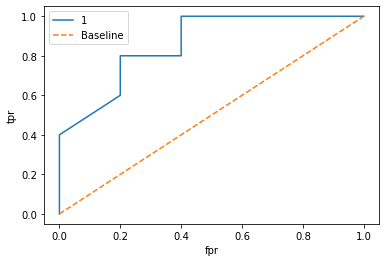

In [2]:
import matplotlib.pyplot as plt
pos = [1,1,1,1,0,1,0,0]
neg = [0,0,1,0,1,0,2,1]
tpr = [cs/sum(pos) for cs in np.cumsum(pos)]
fpr = [cs/sum(neg) for cs in np.cumsum(neg)]
plt.plot([0.0]+fpr+[1.0],[0.0]+tpr+[1.0],"-",label="1")
plt.plot([0.0,1.0],[0.0,1.0],"--",label="Baseline")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

In [7]:
def auc(df,correctlabels):
    new_df=df.copy()
    lens=len(correctlabels)
    cols=new_df.columns.tolist()
    print(cols)
    if len(cols)<3: #binary ;only Pos and Neg
        pos=[i for i in range(lens)  if correctlabels[i]==cols[0]]
        neg=[i for i in range(lens)  if correctlabels[i]!=cols[0]]                    
        print(pos,neg)
        one=new_df[cols[0]]
        auc = 0
        for i in pos:
            for j in neg:
                if one[i] > one[j]:
                    auc += 1
                elif one[i] == one[j]:
                    auc += 0.5

        return auc / (len(pos)*len(neg))
    else:      # CLASS >=3   Pos / non-Pos
        aucs=[]
        for col in cols:
            pos=[i for i in range(lens)  if correctlabels[i]==col]
            nonpos=[i for i in range(lens)  if correctlabels[i]!=col]                      
            print(pos,nonpos)
            one=new_df[col]
            auc = 0
            for i in pos:
                for j in nonpos:
                    if one[i] > one[j]:
                        auc += 1
                    elif one[i] == one[j]:
                        auc += 0.5
            auc=auc/(len(pos)*len(nonpos))
            aucs.append(auc)
        weights=[correctlabels.count(col)/len(correctlabels) for col in cols ]
        print(weights)
        print(aucs)

        weights=np.array(weights)
        aucs=np.array(aucs)
        avg_auc=np.sum(aucs*weights)
        return avg_auc

# test
predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})

correctlabels = ["B","A","B","B","C"]

print("AUC: {}".format(auc(predictions,correctlabels)))

['A', 'B', 'C']
[1] [0, 2, 3, 4]
[0, 2, 3] [1, 4]
[4] [0, 1, 2, 3]
[0.2, 0.6, 0.2]
[0.75, 0.8333333333333334, 1.0]
AUC: 0.8500000000000001


* Brier score(quadratic loss): also known as mean squared error(MSE)
\begin{equation}
Brier score=\frac{1}{n}\sum_{i=1}^n (p_i-o_i)^2
\end{equation}
where $p_i$ are the predicted and $o_i$ the actual(observed) **probabilities** for test instance i, where usually all values are 0 except 1 of the true class label)


### 3.8 Performance metrics for regression

where $p_i$ is the predicted and $o_i$ the actual (observed) target
**(regression) value** for test instance i
* MSE  
\begin{equation}
MSE=\frac{1}{n}\sum_{i=1}^n (p_i-o_i)^2
\end{equation}

* Log loss
\begin{equation}
Log loss=\frac{1}{n}\sum_{i=1}^n o_i log p_i
\end{equation}

* RMSE  
square root of MSE

* Mean Absolute Error (MAE)  
\begin{equation}
MAE=\frac{1}{n}\sum_{i=1}^n |p_i-o_i|
\end{equation}

* Pearson correlation coefficient

Exam Questions  
1.
Assume that we have two classification models M1 and M2
that are evaluated on five test instances. Show with an
example that M1 can have a higher accuracy than M2, while
at the same time M2 has a higher area under the ROC curve
(AUC) than M1.

Answer:
```
y_real = [1,0,0,0,0]

M1_pred = [0,0,0,0,0]
M2_pred = [1,0,0,1,1]
```
In this case, we can get the confusion matrix as following:

||pos|neg|
| --- | --- | --- |
|M1|||
|true|0|1|
|false|0|4|
|M2|||
|true|1|0|
|false|2|2|

and calculate the accuracy, where M1 is 0.8 and M2 is 0.6. Simutaneously, for the AUC, M1 is 0.5 and M2 is 0.75.

2.
Assume that we have generated a regression model for predicting the outdoor temperature using a large training set. However, we then find out that the MSE of the model is significantly higher than of a default model, which just predicts the average outdoor temperature in the training set. Could our model still be more useful for prediction tasks than the default model?

Answer:

Maybe. Because of variance-bias tradeoff, the regression model usually may not captures the regularities in its training data and also generalizes well to unseen data. Prediction by mean yields very simple model but may not perceive the implicit rules of the data and may not generalize well on unseen data.

## 4 Linear Models

use linear models when:  
* Small number of training data
* Low signal-to-noise  
* Sparse data  

The model of choice is in for of $y=w_0+\sum_{j=1}^m x_j w_j + \epsilon$

where input vector is $x=(x_1,...,x_m)$  
output is y  
and weight is $w_j$ also known as regressor that are unknown 
$\epsilon$ is the unobserved error term that has the mean of zero: $\epsilon ~ N(0, \sigma^2)$

The goal is to find such w to make the value of cost function(MSE or RSS) as low as possible.

To minimize the RSS: 


$RSS_{min} = min_w (Y-XW)^T(Y-XW)$

We can prove the weight to achieve the minimal RSS is:

$W = (X^TX)^{-1}X^Ty$



In [14]:
# linear regression
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# use the above formula to calculate W, estimate to find the approximate bias 4, weight 3
# add bias x0=1 to each instance, which is the bias (x0 can be an arbitrary number but not 0)
# https://www.quora.com/Why-add-extra-ones-as-first-column-of-data-in-machine-learning
# np.c_ is to concat two arrays by row
# np.r_ is to concat two arrays by column
X_b = np.c_[np.ones((100,1)), X]
# linear algebra module
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# display the two weights corrsponding to bias 1 and X
display(w_best)

# predict using the w_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add the bias 1 to each intance
y_predict = X_new_b.dot(w_best)
display(y_predict)  # 4+3*X + 1 estimated to 10

array([[4.35278074],
       [2.73088907]])

array([[4.35278074],
       [9.81455889]])

The aboved method, which directly compute the most appropriate parameters of the model, is a so-called close form method. 

However, the time complexity is between $O(n^{2.4})$ to $O(n^3)$ due to the inverse computation, which is very high.

So we should introduce **Gradient Descent**.

repeating updating weights until the output is close enough to the estimated output

$ w_i := w_i - \frac{t}{m}\sum_{i=1}^m(y-y_i)^2*x_0$

We should also examine the **Logistic Regression**, which use the `binary cross entropy` as the cost function and yield the categorical output.

$h_w(X) = g(W^TX)$

$g(z)=\frac{1}{e^{-z}+1}$

if $g(z)>=0.5$  Y=1, else  Y=0

The lost function is 

$J(w) = -\frac{1}{m}\sum_i^my_ilog(h_w(x_i)) + (1-y_i)log(1-h_w(x_i))$

Inference:

When $W^TX<0$, the predicted label is $Y=0$

When $W^TX>0$, the predicted label is $Y=1$

* The reason that it do not use MAE but binary cross entropy is that the derivative of sigmoid will be zero.

* Unlike the case of linear regression, minimizing cross entropy cannot lead to a closed form solution because of the unlinearity of the sigmoid. 


Regularization is a technique one uses to 
* prevent overfitting (the model cannot generalize well to the test/unseen data)
* when learning is ill-posed (when there are more features than instances)

L1 regularization (Lasso)  
$\sum_1^n(y-y_i)^2 + \lambda\sum_1^n|w_i|$

L2 regularization
$\sum_1^n(y-y_i)^2 + \lambda\sum_1^nw_i^2$

Elastic net

$\sum_1^n(y-y_i)^2 + \lambda\sum_1^n|w_i| + \lambda\sum_1^nw_i^2$

> the rationale for choosing polynomial is that it is almost impossible to show the feature of regularization in 2 dimensions!